## Sales Analysis

In [2]:
## Import necessary libraries

import pandas as pd
import os
import matplotlib.pyplot as plt

%matplotlib inline 

#### Merging 12 months of data in a single file

In [6]:
path = "./Sales_Data"

files = [file for file in os.listdir(path)]

all_month_data = pd.DataFrame()

for file in files:
    df = pd.read_csv(path+"/"+file)
    all_month_data = pd.concat([all_month_data,df])

all_month_data.to_csv("all_year.csv",index=False)

In [7]:
all_data = pd.read_csv("all_year.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Clean data

In [8]:
## Drop nan value

all_data =  all_data.dropna()

In [13]:
## Find or value in Month

temp = all_data[all_data["Month"]=="Or"]
temp

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month


In [11]:
## Delete Or Value

all_data = all_data[all_data["Month"].str[0:2] != "Or"]

### Argument data with additional columns

In [12]:
all_data["Month"] = all_data["Order Date"].str[0:2] 

all_data["Month"] =  all_data["Month"].astype("int32")


<ipython-input-12-4476c249e109>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["Month"] = all_data["Order Date"].str[0:2]
<ipython-input-12-4476c249e109>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["Month"] =  all_data["Month"].astype("int32")


In [77]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int32
dtype: object

In [14]:
all_data["Quantity Ordered"] =  all_data["Quantity Ordered"].astype("int32")
all_data["Price Each"] =  all_data["Price Each"].astype("float")


<ipython-input-14-62a314544fd2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["Quantity Ordered"] =  all_data["Quantity Ordered"].astype("int32")
<ipython-input-14-62a314544fd2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["Price Each"] =  all_data["Price Each"].astype("float")


In [16]:
## Add sales column

all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]
all_data

<ipython-input-16-d22a0668ffc1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


In [17]:
moving_column = all_data.pop("Sales")
all_data.insert(4,"Sales",moving_column)

#### What was the best month for sales? How much was earned that month?


In [102]:
sales = all_data.groupby("Month").sum()["Sales"]
sales

Month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: Sales, dtype: float64

Text(0.5, 1.0, 'Sales per Month')

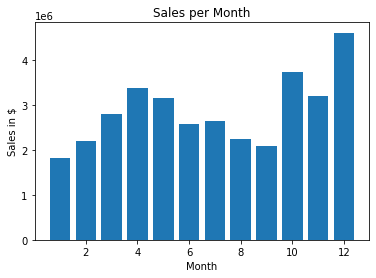

In [105]:
month = range(1,13)

plt.bar(month,sales)
plt.xlabel("Month")
plt.ylabel("Sales in $")
plt.title("Sales per Month")

## December had the highest sales

### What city had the highest number in sales?

In [18]:
## Extract city from Purchase Address 

all_data["City"] = all_data["Purchase Address"].apply(lambda x:x.split(",")[1])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles


In [145]:
sales_city = all_data.groupby("City").sum()["Sales"]
sales_city

City
 Atlanta          2.795499e+06
 Austin           1.819582e+06
 Boston           3.661642e+06
 Dallas           2.767975e+06
 Los Angeles      5.452571e+06
 New York City    4.664317e+06
 Portland         2.320491e+06
 San Francisco    8.262204e+06
 Seattle          2.747755e+06
Name: Sales, dtype: float64

In [150]:

cities = [city for city,sales in sales_city.items()]
print(cities)

[' Atlanta', ' Austin', ' Boston', ' Dallas', ' Los Angeles', ' New York City', ' Portland', ' San Francisco', ' Seattle']


Text(0.5, 1.0, 'Sales per Cities')

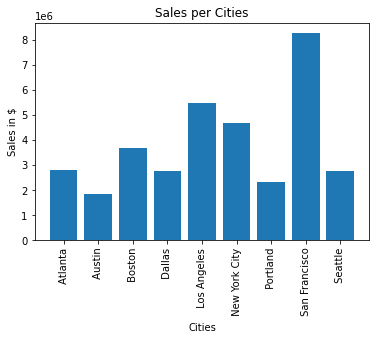

In [152]:
plt.bar(cities,sales_city)
plt.xticks(rotation="vertical")
plt.xlabel("Cities")
plt.ylabel("Sales in $")
plt.title("Sales per Cities")

### >> San Francisco was the city which had the highest sales 

### What time should we display advertisements to maximize the likelihood of customer's buying products?

In [154]:
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])

In [156]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles


In [170]:
all_data["Hour"] =  all_data["Order Date"].dt.hour
all_data["Minute"] =  all_data["Order Date"].dt.minute

In [181]:
hours = [hour for hour,df in all_data.groupby("Hour")]

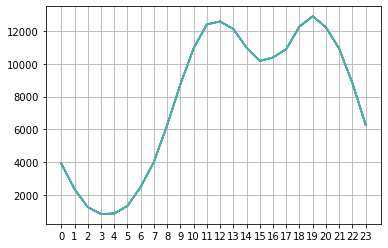

In [186]:
plt.plot(hours,all_data.groupby("Hour").count())
plt.xticks(hours)
plt.grid()

### >> After 11am to 12am and around 6 to 7pm is the best choice


### What products are often sold together?

In [209]:
df = all_data[all_data["Order ID"].duplicated(keep=False)]

df["Grouped"] = all_data.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hour,Minute,Grouped
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,Los Angeles,19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,Los Angeles,19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,Boston,11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [216]:
buytogether = df[["Order ID","Grouped"]].drop_duplicates()

buytogether.value_counts("Grouped")

Grouped
iPhone,Lightning Charging Cable                       882
Google Phone,USB-C Charging Cable                     856
iPhone,Wired Headphones                               361
Vareebadd Phone,USB-C Charging Cable                  312
Google Phone,Wired Headphones                         303
                                                     ... 
LG Dryer,27in FHD Monitor                               1
LG Dryer,27in 4K Gaming Monitor                         1
Google Phone,Wired Headphones,USB-C Charging Cable      1
Google Phone,Wired Headphones,Macbook Pro Laptop        1
iPhone,iPhone                                           1
Length: 366, dtype: int64

### >> iPhone,Lightning Charging Cable are the products that customers bought together most


### What product sold the most? Why do you think it sold the most?

In [217]:
all_data


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hour,Minute,Grouped
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas,8,46,USB-C Charging Cable
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston,22,30,Bose SoundSport Headphones
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,14,38,"Google Phone,Wired Headphones"
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles,9,27,Wired Headphones
...,...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,8.97,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,Los Angeles,20,56,AAA Batteries (4-pack)
186846,259354,iPhone,1,700.00,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,San Francisco,16,0,iPhone
186847,259355,iPhone,1,700.00,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,San Francisco,7,39,iPhone
186848,259356,34in Ultrawide Monitor,1,379.99,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,San Francisco,17,30,34in Ultrawide Monitor


In [22]:
product_data =  all_data.groupby("Product").sum()["Quantity Ordered"]
product_data

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int32

In [23]:
product = [product for product,df in product_data.items()]

['20in Monitor', '27in 4K Gaming Monitor', '27in FHD Monitor', '34in Ultrawide Monitor', 'AA Batteries (4-pack)', 'AAA Batteries (4-pack)', 'Apple Airpods Headphones', 'Bose SoundSport Headphones', 'Flatscreen TV', 'Google Phone', 'LG Dryer', 'LG Washing Machine', 'Lightning Charging Cable', 'Macbook Pro Laptop', 'ThinkPad Laptop', 'USB-C Charging Cable', 'Vareebadd Phone', 'Wired Headphones', 'iPhone']


Text(0, 0.5, 'Quantity Ordered')

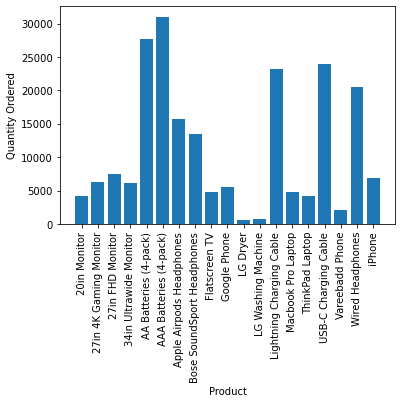

In [30]:
plt.bar(product,product_data)
plt.xticks(rotation="vertical")
plt.xlabel("Product")
plt.ylabel("Quantity Ordered")

### >> AAA Batteries (4-pack) is the product with highest quantity ordered

In [36]:
prices = all_data.groupby("Product").mean()["Price Each"]
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

<ipython-input-37-e89c5fcf5dc5>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product, rotation='vertical', size=8)
<ipython-input-37-e89c5fcf5dc5>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


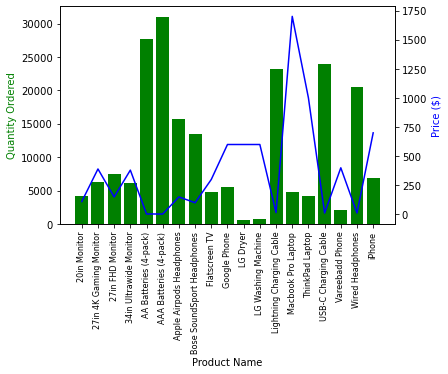

In [37]:

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(product,product_data, color='g')
ax2.plot(product, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(product, rotation='vertical', size=8)

fig.show()

###  >> As can be seen, the lower the prices, the higher the products and in contrast the higher the product, the lower the quantity ordered